# Data Preparation & Exploration

## Importing the data

In [30]:
import pandas as pd

In [31]:
voice_data = pd.read_csv('data/origin/voice.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [32]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

## Understanding the data

This dataset includes 3,168 records with 21 variables that measure various acoustic properties of voices and their gender. The variables are as follows:

* `meanfreq`: mean frequency (in kHz)
* `sd`: standard deviation of frequency
* `median`: median frequency (in kHz)
* `Q25`: first quantile (in kHz)
* `Q75`: third quantile (in kHz)
* `IQR`: inter-quantile range (in kHz)
* `skew`: skewness
* `kurt`: kurtosis
* `sp.ent`: spectral entropy
* `sfm`: spectral flatness
* `mode`: mode frequency
* `centroid`: frequency centroid (see `specprop`)
* `peakf`: peak frequency (frequency with the highest energy)
* `meanfun`: average of fundamental frequency measured across acoustic signal
* `minfun`: minimum fundamental frequency measured across acoustic signal
* `maxfun`: maximum fundamental frequency measured across acoustic signal
* `meandom`: average of dominant frequency measured across acoustic signal
* `mindom`: minimum of dominant frequency measured across acoustic signal
* `maxdom`: maximum of dominant frequency measured across acoustic signal
* `dfrange`: range of dominant frequency measured across acoustic signal
* `modindx`: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
label: male or female


### Skewness and Kurtosis

Skewness and kurtosis are used to measure the asymmetry and shape of the frequency distribution.

Skewness ($S$) is calculated using the formula:

$$
S = \frac{1}{n - 1}\cdot\frac{\sum_{i=1}^n{\left(x - \overline{x}\right)^3}}{\sigma^3}
$$

where $n$ is the number of observations, $\overline{x}$ is the mean, and $\sigma$ is the standard deviation. A negative skewness value indicates that the spectrum is skewed to the left, a value of 0 indicates a symmetrical spectrum, and a positive value indicates that the spectrum is skewed to the right.

Kurtosis ($K$) is calculated using the formula:

$$
K = \frac{1}{n - 1}\cdot\frac{\sum_{i=1}^n{\left(x - \overline{x}\right)^4}}{\sigma^4}
$$

A value of less than 3 indicates a platykurtic distribution, which has fewer observations in the center and tails than the normal distribution but more in the shoulders. A value of 3 indicates a normal distribution, while a value greater than 3 indicates a leptokurtic distribution, which has more observations in the center and tails and fewer in the shoulders relative to a normal distribution with the same mean and variance.

### Flatness

The spectral flatness is a measure of the spectral shape of a signal. It is defined as the ratio of the geometric mean to the arithmetic mean of the signal's power spectrum:
$$
F = \frac{\sqrt[n]{\prod_{i=1}^n{p_i}}}{\frac{1}{n}\sum_{i=1}^n{p_i}}
$$
where $n$ is the number of frequency bins, $p_i$ is the power in the $i$-th frequency bin, and $F$ is the spectral flatness.

The greater $F$ is, the more flat the spectrum is.

## Data Visualization

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution of the target variable

In [34]:
voice_data['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

So, if we randomly answer `male` or `female` for each record, we will be correct $50\%$ of the time.

### Distribution of the variables

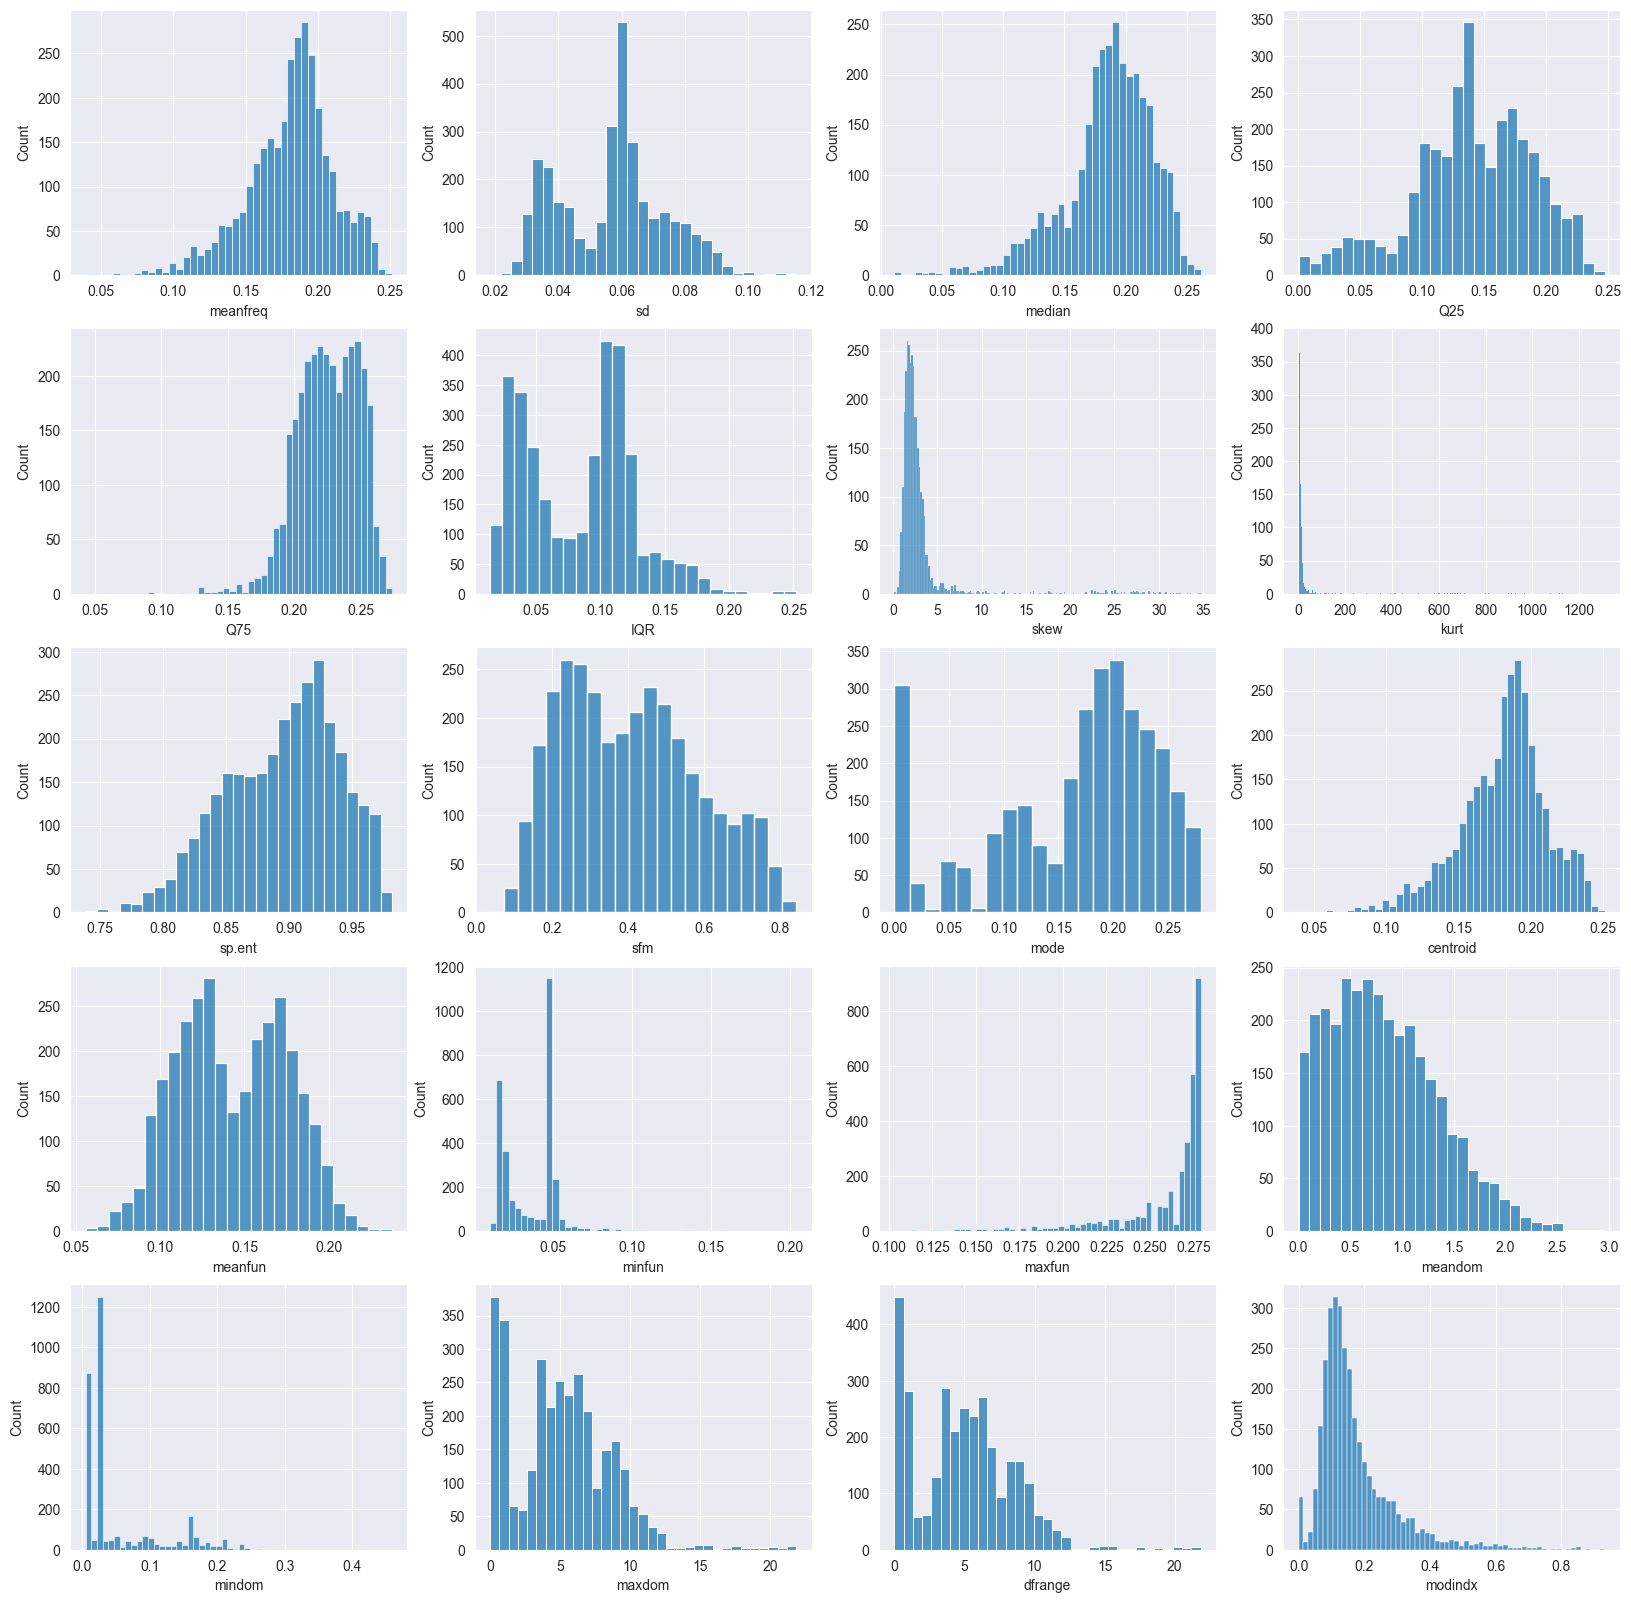

In [35]:
f, axes = plt.subplots(5, 4, figsize=(20, 20))
for i, col in enumerate(voice_data.columns[:-1]):
    sns.histplot(voice_data[col], ax=axes[i // 4, i % 4])

### Correlation between variables

In our intuition, `meanfreq`, `median`, `Q25` and `Q75` should be highly correlated. Let's check it out.

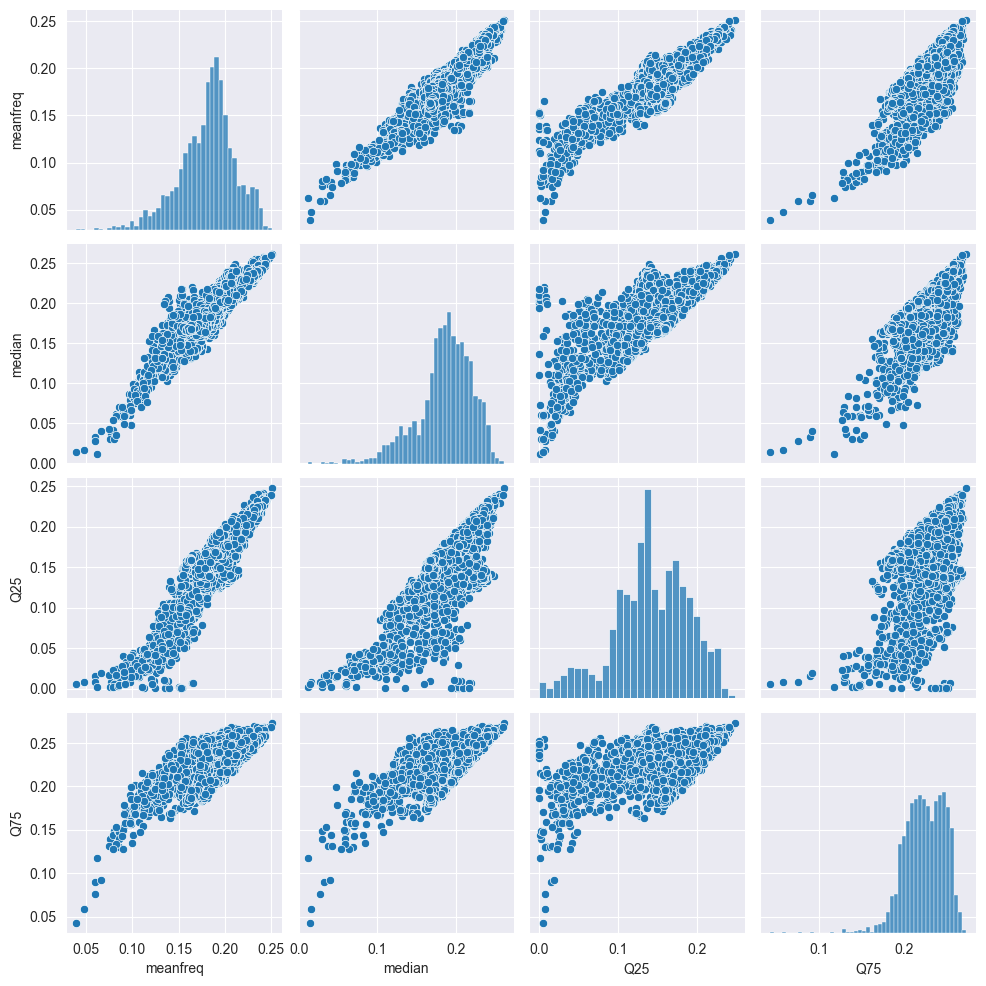

In [36]:
distribution_cols = ['meanfreq', 'median', 'Q25', 'Q75']
sns.pairplot(voice_data[distribution_cols])

<Axes: >

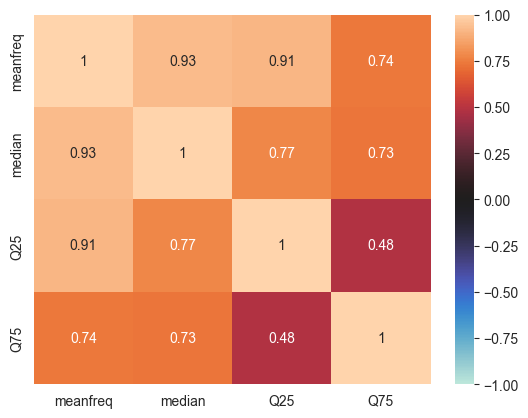

In [37]:
sns.heatmap(voice_data[distribution_cols].corr(), annot=True, vmin=-1, vmax=1, center=0)

We found that `meanfreq` is highly correlated with `median` and `Q75`, but `Q25` is slightly independent of the other three variables.

## Reference

* [Data Set from Kaggle](https://www.kaggle.com/datasets/primaryobjects/voicegender)
* [`seeware` R package document](https://cran.r-project.org/web/packages/seewave/seewave.pdf)
* [`WarbleR` R package document](https://cran.r-project.org/web/packages/warbleR/warbleR.pdf)